In [ ]:
import numpy as np
from sklearn.cluster import KMeans

data = np.array([15, 16, 17, 18, 20, 21, 22, 25, 26, 27, 30, 32, 33, 34, 36, 37, 38, 40, 42, 45])

# Reshaping to a 2D array
data = data.reshape(-1, 1)

initial_centroids = np.array([15, 26, 37]).reshape(-1, 1)

kmeans = KMeans(n_clusters=3, init=np.array([[15], [26], [37.4]]), n_init=1, random_state=42)
kmeans.fit(data)

# Store cluster centers in variables
b1, b2, b3 = kmeans.cluster_centers_.flatten()

# Output the results
print("Cluster centers:")
print("b1:", b1)
print("b2:", b2)
print("b3:", b3)


Cluster centers:
b1: 17.833333333333332
b2: 26.0
b3: 37.44444444444444


In [ ]:
!pip install simpful

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

Fuzzy inference result: {'result': 26.000008024056093}


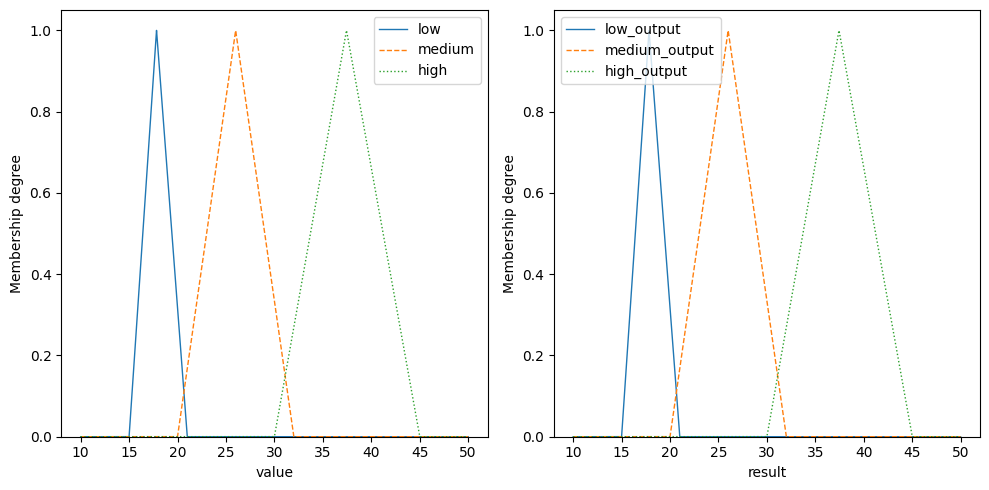

In [ ]:
from simpful import *

# Example cluster centers from KMeans
# b1, b2, b3 = 18.0, 28.5, 38.2  # Replace with your actual cluster centers

# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets for input variable "value"
A1 = FuzzySet(function=Triangular_MF(a=15, b=b1, c=21), term="low")
A2 = FuzzySet(function=Triangular_MF(a=20, b=b2, c=32), term="medium")
A3 = FuzzySet(function=Triangular_MF(a=30, b=b3, c=45), term="high")
FS.add_linguistic_variable("value", LinguisticVariable([A1, A2, A3], universe_of_discourse=[10, 50]))

# Define fuzzy sets for output variable "result"
B1 = FuzzySet(function=Triangular_MF(a=15, b=b1, c=21), term="low_output")
B2 = FuzzySet(function=Triangular_MF(a=20, b=b2, c=32), term="medium_output")
B3 = FuzzySet(function=Triangular_MF(a=30, b=b3, c=45), term="high_output")
FS.add_linguistic_variable("result", LinguisticVariable([B1, B2, B3], universe_of_discourse=[10, 50]))

# Define fuzzy rules
R1 = "IF (value IS low) THEN (result IS low_output)"
R2 = "IF (value IS medium) THEN (result IS medium_output)"
R3 = "IF (value IS high) THEN (result IS high_output)"
FS.add_rules([R1, R2, R3])

# Set antecedent value
FS.set_variable("value", 28)  # Example input value

# Perform Mamdani inference and print the output
output = FS.Mamdani_inference(["result"])
print("Fuzzy inference result:", output)
# Plot all linguistic variables and save them in a output file
FS.produce_figure(outputfile='lvs.pdf')
